# black friday

# importing lib

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import scipy
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('blacktrain.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# handling missing values

In [6]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
train['Product_Category_2'].fillna(train['Product_Category_2'].median(),inplace=True)
train['Product_Category_3'].fillna(train['Product_Category_3'].median(),inplace=True)

In [8]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [9]:
train.drop('User_ID',axis = 1,inplace = True)
train.drop('Product_ID',axis = 1,inplace = True)
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,9.0,14.0,1422
3,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,14.0,7969


# handling outliers

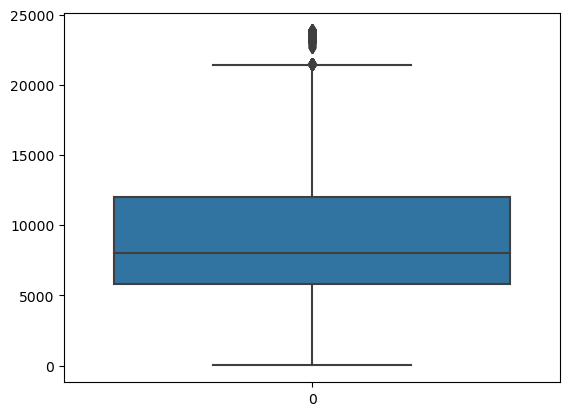

In [10]:
sns.boxplot(train.Purchase);

In [11]:
q1 = train.Purchase.quantile(0.25)
q3 = train.Purchase.quantile(0.75)

iqr = q3-q1
print(iqr)

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print(upper)
print(lower)

6231.0
21400.5
-3523.5


In [12]:
train['Purchase'].where(train['Purchase']<upper, train['Purchase'].median(),inplace =True)
train['Purchase'].where(train['Purchase']>lower, train['Purchase'].median(),inplace =True)

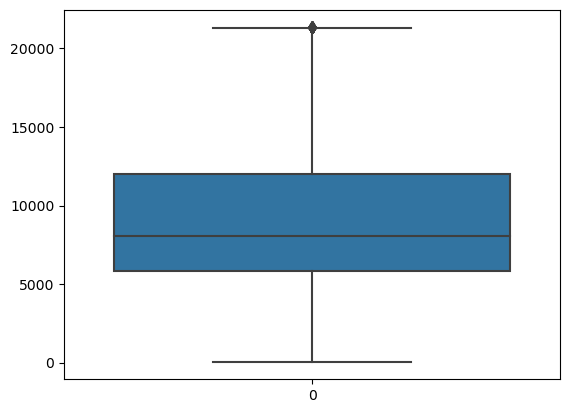

In [13]:
sns.boxplot(train.Purchase);

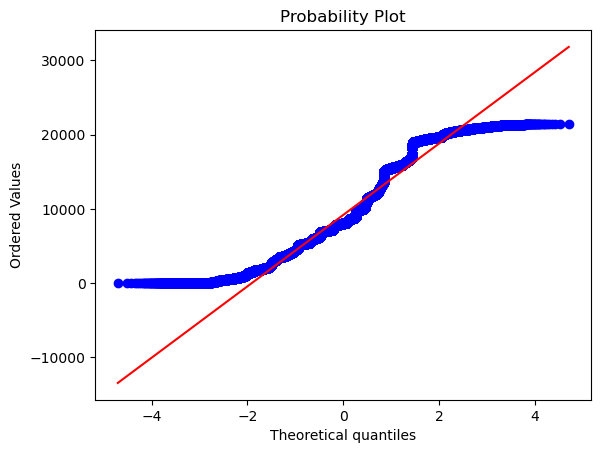

In [20]:
stats.probplot(train.Purchase, plot=plt); plt.show()

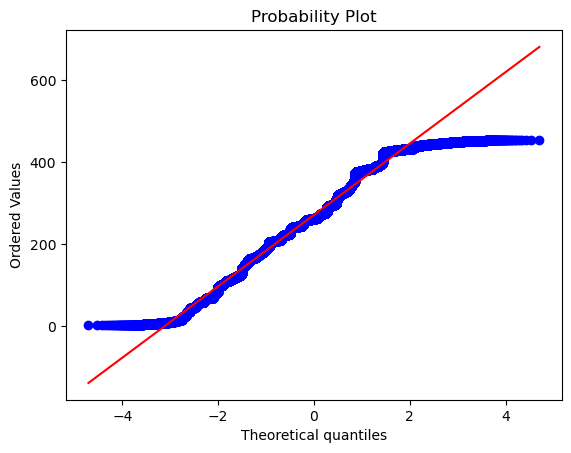

In [25]:
train.Purchase = pd.Series(stats.boxcox(train.Purchase,lmbda=stats.boxcox_normmax(train.Purchase)))
stats.probplot(train.Purchase, plot=plt); plt.show()

# label encoding

In [28]:
train.Gender

0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 550068, dtype: object

In [29]:
l1 = LabelEncoder()
train['Gender'] = l1.fit_transform(train['Gender'])
print(train['Gender'])#male = 1 female = 0

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int32


In [30]:
l2 = LabelEncoder()
train['City_Category'] = l2.fit_transform(train['City_Category'])
print(train['City_Category'])

0         0
1         0
2         0
3         0
4         2
         ..
550063    1
550064    2
550065    1
550066    2
550067    1
Name: City_Category, Length: 550068, dtype: int32


In [31]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,0,2,0,3,9.0,14.0,268.481533
1,0,0-17,10,0,2,0,1,6.0,14.0,375.017462
2,0,0-17,10,0,2,0,12,9.0,14.0,98.594334
3,0,0-17,10,0,2,0,12,14.0,14.0,83.198355
4,1,55+,16,2,4+,0,8,9.0,14.0,261.186978


In [32]:
l3 = LabelEncoder()
train['Age'] = l3.fit_transform(train['Age'])
print(train['Age'])

0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age, Length: 550068, dtype: int32


In [33]:
l4 = LabelEncoder()
train['Stay_In_Current_City_Years'] = l4.fit_transform(train['Stay_In_Current_City_Years'])
print(train['Stay_In_Current_City_Years'])

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int32


In [35]:
X = train.iloc[:,:9]
y = train.iloc[:,9]

0         268.481533
1         375.017462
2          98.594334
3          83.198355
4         261.186978
             ...    
550063     45.071925
550064     45.288209
550065     24.858296
550066     44.854856
550067     53.320260
Name: Purchase, Length: 550068, dtype: float64

# splitting our data into train and test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size = 0.3)

# fitting and training model

In [36]:
lin_reg = LinearRegression()

In [38]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

6436.363588477287


In [40]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.16825579855585004
